In [3]:
################ Initialisation ####################
rm(list=ls())
shhh <- suppressPackageStartupMessages
shhh(library(dplyr))
library(magrittr)
library(reshape2)
library(tidyquant)
library(directlabels)

In [4]:
############### Collect the stock price and benchmark data #############

nvda <- "NVDA" %>%
  tq_get(get = "stock.prices",
         from =  "2017-01-01",
         to = Sys.Date())

amd <- "AMD" %>%
  tq_get(get = "stock.prices",
         from =  "2017-01-01",
         to = Sys.Date())

txn <- "TXN" %>%
  tq_get(get = "stock.prices",
         from =  "2017-01-01",
         to = Sys.Date())


intc <- "INTC" %>%
  tq_get(get = "stock.prices",
         from =  "2017-01-01",
         to = Sys.Date())

nasdaq <- "^IXIC" %>%
  tq_get(get = "stock.prices",
         from = "2017-01-01",
         to = Sys.Date())

In [6]:
########## Join the data together ###########
# Ra is the asset price
# Rb is the benchmark price (NASDAQ)
RaRb <- nvda %>%
  full_join(., amd, by = "date") %>%
  full_join(., intc, by = "date") %>%
  full_join(., nasdaq, by = "date") %>%
  select(date, adjusted.x, adjusted.y, adjusted.x.x, adjusted.y.y) %>%
  set_colnames(c("date", "NVDA", "AMD", "INTC", "NASDAQ"))

head(RaRb)

date,NVDA,AMD,INTC,NASDAQ
2017-01-03,101.1116,11.43,34.06019,5429.08
2017-01-04,103.4707,11.43,33.88338,5477.00
2017-01-05,100.8440,11.24,33.82755,5487.94
2017-01-06,102.1920,11.32,33.94852,5521.06
2017-01-09,106.3352,11.49,34.06950,5531.82
2017-01-10,105.5323,11.44,34.00436,5551.82


In [13]:
############# Normalise the data ################## 
normalise_series <- function(xdat) xdat / coredata(xdat)[1]

normalised_RaRb <- RaRb %>%
  mutate(NVDA = normalise_series(NVDA),
         AMD = normalise_series(AMD),
         INTC = normalise_series(INTC),
         NASDAQ = normalise_series(NASDAQ))

print("The first 6 observations of the normalised prices")
head(normalised_RaRb)
print("The final 6 observations of the normalised prices")
tail(normalised_RaRb)

[1] "The first 6 observations of the normalised prices"


date,NVDA,AMD,INTC,NASDAQ
2017-01-03,1.0000000,1.0000000,1.0000000,1.000000
2017-01-04,1.0233310,1.0000000,0.9948089,1.008827
2017-01-05,0.9973533,0.9833771,0.9931697,1.010842
2017-01-06,1.0106852,0.9903762,0.9967214,1.016942
2017-01-09,1.0516616,1.0052493,1.0002734,1.018924
2017-01-10,1.0437211,1.0008749,0.9983608,1.022608


[1] "The final 6 observations of the normalised prices"


date,NVDA,AMD,INTC,NASDAQ
2019-08-16,1.578058,2.727909,1.365230,1.454388
2019-08-19,1.689024,2.754156,1.386663,1.474064
2019-08-20,1.660244,2.687664,1.368166,1.464071
2019-08-21,1.693475,2.773403,1.384314,1.477269
2019-08-22,1.695947,2.790901,1.373451,1.471960
2019-08-23,1.606541,2.584427,1.320016,1.427824


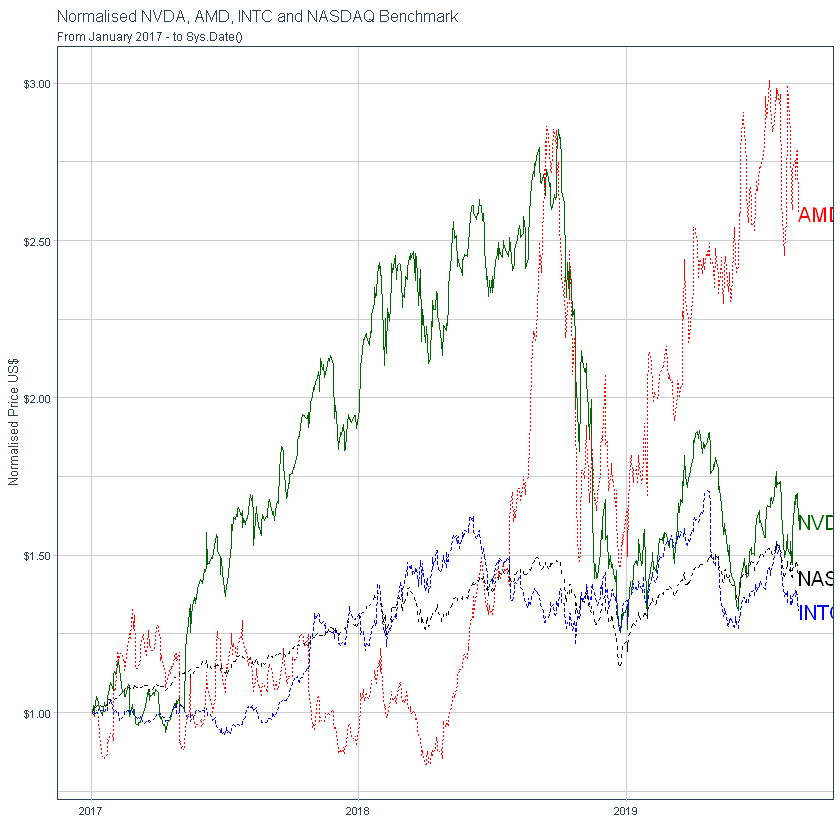

In [19]:
############# Melt the data and plot #############

normalised_RaRb %>%
  melt(id = "date") %>%
  ggplot(aes(x = date, y = value, color = variable)) +
  geom_line(aes(linetype = variable)) +
  #scale_color_manual(values=c("red", "black", "darkblue", "yellow", "green")) +
  labs(title = "Normalised NVDA, AMD, INTC and NASDAQ Benchmark",
       x = "", subtitle = "From January 2017 - to Sys.Date()", y = "Normalised Price US$", color = "") +
  scale_y_continuous(labels = scales::dollar) +
  theme_tq(base_size = 8) +
  geom_dl(aes(label = variable), method = list(dl.combine("last.points"), cex = 1)) +
  scale_color_manual(values = c(NASDAQ = 'black',
                                NVDA = 'darkgreen',
                                AMD = 'red',
                                INTC = 'blue')) +
  theme(legend.position = "none")